### Find word frequencies for artists
using wordlcloud
but also saving for future reference

In [1]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#### Add extra words to remove, that dont seem too interesting / appear in too many results

In [53]:
extra_words = ['dont', 'im', 'know', 'yeah']
stopwords_extra = STOPWORDS.update(extra_words)

In [3]:
df_path = '../dataframes/genres/cleaned_combined.csv'

In [8]:
# import os
# os.getcwd()
# os.chdir('finalized_scripts')

In [9]:
df = pd.read_csv(df_path, index_col = 0)

In [10]:
df.head()

,Artist,Song Title,Full Title,Release Date,Year,Month,Day,Pageviews,url,featured_count,producer_count,writer_count,Song Lyrics,Artist Image,gender,genre
0,Aaliyah,Are You That Somebody?,Are You That Somebody? by Aaliyah (Ft. Timbaland),1998-05-26,1998.0,5.0,26.0,373960,https://genius.com/Aaliyah-are-you-that-somebo...,1,1,2,dirty south can yall really feel me east coas...,https://images.genius.com/3fea34947a97beb226fc...,female,pop
1,Aaliyah,Enough Said,Enough Said by Aaliyah (Ft. Drake),2012-08-05,2012.0,8.0,5.0,316333,https://genius.com/Aaliyah-enough-said-lyrics,1,1,3,uh cause i yall arent ready for this ooh oh y...,https://images.genius.com/3fea34947a97beb226fc...,female,pop
2,Aaliyah,At Your Best (You Are Love),At Your Best (You Are Love) by Aaliyah,1994-08-22,1994.0,8.0,22.0,285549,https://genius.com/Aaliyah-at-your-best-you-ar...,0,1,6,let me know let me know haah haaaah let me kn...,https://images.genius.com/3fea34947a97beb226fc...,female,pop
3,Aaliyah,Miss You,Miss You by Aaliyah,2002-11-16,2002.0,11.0,16.0,245608,https://genius.com/Aaliyah-miss-you-lyrics,0,1,3,oh hey yeahyeahyeah nononononono its been to...,https://images.genius.com/3fea34947a97beb226fc...,female,pop
4,Aaliyah,Age Ain’t Nothing But a Number,Age Ain't Nothing But a Number by Aaliyah,1994-12-06,1994.0,12.0,6.0,207419,https://genius.com/Aaliyah-age-aint-nothing-bu...,0,1,1,may fifth 1993 aaliyahs diary got it age ain...,https://images.genius.com/3fea34947a97beb226fc...,female,pop


In [11]:
artists = list(df['Artist'].unique())
len(artists)

40

### Get top 20 words for each artists lyrics corpus, save the words and their frequencies
'top_words' column for wordcloud generation  
split columns for possible deeper analysis

#### How many top words?

In [12]:
n_words = 20

In [13]:
words_columns = [f'word{n}' for n in range(n_words)]
counts_columns = [f'word{n}_count' for n in range(n_words)]

In [18]:
cols = ['Artist', 'genre', 'gender', f'top_words', *words_columns, *counts_columns]
cols

['Artist',
 'genre',
 'gender',
 'top_words',
 'word0',
 'word1',
 'word2',
 'word3',
 'word4',
 'word5',
 'word6',
 'word7',
 'word8',
 'word9',
 'word10',
 'word11',
 'word12',
 'word13',
 'word14',
 'word15',
 'word16',
 'word17',
 'word18',
 'word19',
 'word0_count',
 'word1_count',
 'word2_count',
 'word3_count',
 'word4_count',
 'word5_count',
 'word6_count',
 'word7_count',
 'word8_count',
 'word9_count',
 'word10_count',
 'word11_count',
 'word12_count',
 'word13_count',
 'word14_count',
 'word15_count',
 'word16_count',
 'word17_count',
 'word18_count',
 'word19_count']

In [54]:
top_n_words_df = pd.DataFrame(columns = cols)

In [55]:
wc = WordCloud(stopwords = STOPWORDS, max_words=n_words, collocations=False)

for artist in artists:
    artist_df = df[df['Artist'] == artist]
    lyrics = ' '.join(artist_df['Song Lyrics'].str.lower())
    
    wc.generate(lyrics)
    words_fc = pd.Series(wc.words_)
    top_words = list(words_fc.index)
    top_string = ' '.join(top_words)
    top_counts = list(words_fc.values)

    artist_df.reset_index(inplace=True)
    new_row = {
        'Artist': artist,
        'genre': artist_df['genre'][0],
        'gender': artist_df['gender'][0],
        'top_words': top_string
    }

    for index, word in enumerate(top_words):
        new_row[ words_columns[index] ] = word
        new_row[ counts_columns[index] ] = top_counts[index]
    
    new_row_df = pd.DataFrame([new_row])
    new_row_df.index = [artist]
    
    top_n_words_df = pd.concat([top_n_words_df, new_row_df])

C:\Users\User\AppData\Local\Temp\ipykernel_15052\1319348823.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  top_n_words_df = pd.concat([top_n_words_df, new_row_df])


In [56]:
top_n_words_df.sample(5)

,top_words,word0,word1,word2,word3,word4,word5,word6,word7,word8,...,word13_count,word14_count,word15_count,word16_count,word17_count,word18_count,word19_count,Artist,genre,gender
Taylor Swift,never made youre time cause look got oh go wan...,never,made,youre,time,cause,look,got,oh,go,...,0.492308,0.492308,0.446154,0.430769,0.430769,0.415385,0.415385,Taylor Swift,pop,female
Curtis Mayfield,love world got time mind new man right see day...,love,world,got,time,mind,new,man,right,see,...,0.471698,0.471698,0.452830,0.433962,0.433962,0.415094,0.396226,Curtis Mayfield,soul,male
Kanye West,bam now got nigga aint ey look see swerve go l...,bam,now,got,nigga,aint,ey,look,see,swerve,...,0.608696,0.608696,0.579710,0.579710,0.579710,0.550725,0.536232,Kanye West,rap,male
Eminem,cause cant go got back superman fuck thats shi...,cause,cant,go,got,back,superman,fuck,thats,shit,...,0.500000,0.490385,0.480769,0.471154,0.461538,0.451923,0.451923,Eminem,rap,male
Black Sabbath,now oh love god will might dead mind world lif...,now,oh,love,god,will,might,dead,mind,world,...,0.419355,0.387097,0.387097,0.387097,0.354839,0.322581,0.322581,Black Sabbath,rock,male


In [57]:
top_n_words_df.to_csv(f'../dataframes/top_{n_words}_filtered_words_by_artist.csv')

#### Top words generation for genres

In [36]:
genres = list(df['genre'].unique())
len(genres)

4

In [39]:
n_words = 20

words_columns = [f'word{n}' for n in range(n_words)]
counts_columns = [f'word{n}_count' for n in range(n_words)]

cols = [f'top_words', *words_columns, *counts_columns]
cols

['top_words',
 'word0',
 'word1',
 'word2',
 'word3',
 'word4',
 'word5',
 'word6',
 'word7',
 'word8',
 'word9',
 'word10',
 'word11',
 'word12',
 'word13',
 'word14',
 'word15',
 'word16',
 'word17',
 'word18',
 'word19',
 'word0_count',
 'word1_count',
 'word2_count',
 'word3_count',
 'word4_count',
 'word5_count',
 'word6_count',
 'word7_count',
 'word8_count',
 'word9_count',
 'word10_count',
 'word11_count',
 'word12_count',
 'word13_count',
 'word14_count',
 'word15_count',
 'word16_count',
 'word17_count',
 'word18_count',
 'word19_count']

In [58]:
genre_top_n_words_df = pd.DataFrame(columns = cols)

In [59]:
wc = WordCloud(stopwords = STOPWORDS, max_words=n_words, collocations=False)

for genre in genres:
    genre_df = df[df['genre'] == genre]
    lyrics = ' '.join(genre_df['Song Lyrics'].str.lower())
    
    wc.generate(lyrics)
    words_fc = pd.Series(wc.words_)
    top_words = list(words_fc.index)
    top_string = ' '.join(top_words)
    top_counts = list(words_fc.values)

    genre_df.reset_index(inplace=True)
    new_row = {
        'top_words': top_string
    }

    for index, word in enumerate(top_words):
        new_row[ words_columns[index] ] = word
        new_row[ counts_columns[index] ] = top_counts[index]
    
    new_row_df = pd.DataFrame([new_row])
    new_row_df.index = [genre]
    
    genre_top_n_words_df = pd.concat([genre_top_n_words_df, new_row_df])

C:\Users\User\AppData\Local\Temp\ipykernel_15052\579480197.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  genre_top_n_words_df = pd.concat([genre_top_n_words_df, new_row_df])


In [60]:
genre_top_n_words_df

,top_words,word0,word1,word2,word3,word4,word5,word6,word7,word8,...,word10_count,word11_count,word12_count,word13_count,word14_count,word15_count,word16_count,word17_count,word18_count,word19_count
pop,love got oh baby youre let wanna go want cause...,love,got,oh,baby,youre,let,wanna,go,want,...,0.429858,0.425997,0.422136,0.414414,0.391248,0.378378,0.378378,0.356499,0.350064,0.342342
rock,oh now love might ah time way come one never c...,oh,now,love,might,ah,time,way,come,one,...,0.450980,0.414216,0.394608,0.360294,0.352941,0.350490,0.350490,0.348039,0.345588,0.343137
rap,nigga got now aint cause one go shit love back...,nigga,got,now,aint,cause,one,go,shit,love,...,0.469799,0.451902,0.406040,0.390380,0.376957,0.371365,0.363535,0.352349,0.348993,0.338926
soul,love baby oh got let come day might time now r...,love,baby,oh,got,let,come,day,might,time,...,0.282636,0.268695,0.230672,0.229404,0.223067,0.220532,0.219265,0.212928,0.198986,0.196451


In [61]:
genre_top_n_words_df.to_csv(f'../dataframes/top_{n_words}_filtered_words_by_genre.csv')

### Test visualizations

#### by genre

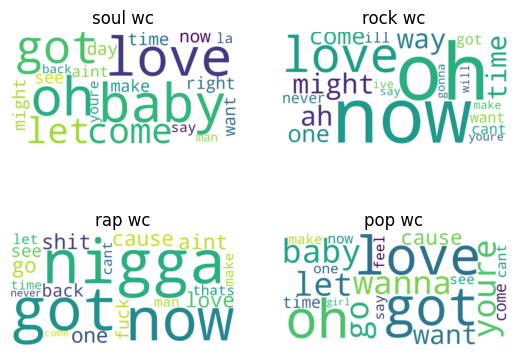

In [62]:
for index, row in enumerate(genre_top_n_words_df.sample(4).iterrows()):
    words = row[1]['top_words'].lower()

    sum_wc = WordCloud(background_color="white", stopwords=STOPWORDS, max_words=20,
              width=800, height=400, collocations=False)
    sum_wc.generate(words)

    plt.subplot(2,2, index+1)
    
    plt.imshow(sum_wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{row[0]} wc')

#### by artist

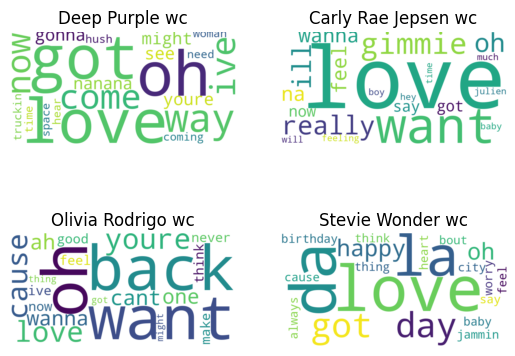

In [63]:
for index, artist in enumerate(top_n_words_df.sample(4).iterrows()):
    words = artist[1]['top_words'].lower()
    
    sum_wc = WordCloud(background_color="white", stopwords=STOPWORDS, max_words=20,
              width=800, height=400, collocations=False)
    sum_wc.generate(words)

    plt.subplot(2,2, index+1)
    
    plt.imshow(sum_wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{artist[1]["Artist"]} wc')

### =========== tests =============

In [20]:
test_df = df[df['Artist'] == 'Nas']

In [21]:
test_df.head()

,Artist,Song Title,Full Title,Release Date,Year,Month,Day,Pageviews,url,featured_count,producer_count,writer_count,Song Lyrics,Artist Image,gender,genre
560,Nas,N.Y. State of Mind,N.Y. State of Mind by Nas,1994-04-19,1994.0,4.0,19.0,2130085,https://genius.com/Nas-ny-state-of-mind-lyrics,0,1,2,yeah yeah ayo black—its time word word its t...,https://images.genius.com/23061dd2dc7e863127db...,male,rap
561,Nas,Ether,Ether by Nas,2001-12-04,2001.0,12.0,4.0,1706821,https://genius.com/Nas-ether-lyrics,0,1,2,fuck jayz whats up niggas ayo i know you aint...,https://images.genius.com/23061dd2dc7e863127db...,male,rap
562,Nas,Life’s a Bitch,Life's a Bitch by Nas (Ft. AZ),1994-04-19,1994.0,4.0,19.0,1315420,https://genius.com/Nas-lifes-a-bitch-lyrics,1,1,6,ayo whats up whats up lets keep it real son ...,https://images.genius.com/23061dd2dc7e863127db...,male,rap
563,Nas,The World Is Yours,The World Is Yours by Nas,1994-05-31,1994.0,5.0,31.0,1110123,https://genius.com/Nas-the-world-is-yours-lyrics,0,1,2,its yours whose world is this the world is yo...,https://images.genius.com/23061dd2dc7e863127db...,male,rap
564,Nas,The Message,The Message by Nas,1996-07-02,1996.0,7.0,2.0,749005,https://genius.com/Nas-the-message-lyrics,0,1,4,fake thug no love you get the slug cb4 gusto...,https://images.genius.com/23061dd2dc7e863127db...,male,rap


In [22]:
lyrics = ' '.join(test_df['Song Lyrics'].str.lower())

In [23]:
wc = WordCloud(stopwords = STOPWORDS, max_words=15, collocations=False)

In [27]:
wc.generate(lyrics)
words_fc = pd.Series(wc.words_)
top_words = list(words_fc.index)
top_string = ' '.join(top_words)
top_counts = list(words_fc.values)

In [28]:
top_counts

[1.0,
 0.8306451612903226,
 0.8225806451612904,
 0.8145161290322581,
 0.7016129032258065,
 0.6854838709677419,
 0.5806451612903226,
 0.5483870967741935,
 0.49193548387096775,
 0.43548387096774194,
 0.4274193548387097,
 0.4274193548387097,
 0.41935483870967744,
 0.4112903225806452,
 0.3951612903225806]